In [365]:
import pandas as pd
import numpy as np
import chardet
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objs as go
import plotly.plotly as py
import plotly
plotly.tools.set_credentials_file(username='kaylixe86', api_key='2xETTOyrrgFqZ7iA1uyV')
from plotly import tools
from datetime import datetime
from sklearn import linear_model
import os
import folium
import folium.plugins

In [56]:
import matplotlib     
matplotlib.rc('xtick', labelsize=20)     
matplotlib.rc('ytick', labelsize=20)

# Introduction

 ## Import data

###  Import Median household income Dataset

In [66]:
with open('MedianHouseholdIncome2015.csv', 'rb') as f:
    result = chardet.detect(f.read())
income =pd.read_csv('MedianHouseholdIncome2015.csv', encoding=result['encoding'])

In [67]:
income.shape

(29322, 3)

In [68]:
income.head()

,Geographic Area,City,Median Income
0,AL,Abanda CDP,11207
1,AL,Abbeville city,25615
2,AL,Adamsville city,42575
3,AL,Addison town,37083
4,AL,Akron town,21667


In [69]:
income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29322 entries, 0 to 29321
Data columns (total 3 columns):
Geographic Area    29322 non-null object
City               29322 non-null object
Median Income      29271 non-null object
dtypes: object(3)
memory usage: 687.3+ KB


### Import Poverty Level Dataset

In [70]:
with open('PercentagePeopleBelowPovertyLevel.csv', 'rb') as f:
    result = chardet.detect(f.read())
poverty =pd.read_csv('PercentagePeopleBelowPovertyLevel.csv', encoding=result['encoding'])

In [71]:
poverty.shape

(29329, 3)

In [72]:
poverty.head()

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42


In [73]:
poverty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
Geographic Area    29329 non-null object
City               29329 non-null object
poverty_rate       29329 non-null object
dtypes: object(3)
memory usage: 687.5+ KB


### Import High School Completion Percentage

In [74]:
with open('PercentOver25CompletedHighSchool.csv', 'rb') as f:
    result = chardet.detect(f.read())
highschool =pd.read_csv('PercentOver25CompletedHighSchool.csv', encoding=result['encoding'])

In [75]:
highschool.shape

(29329, 3)

In [76]:
highschool.head()

,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,21.2
1,AL,Abbeville city,69.1
2,AL,Adamsville city,78.9
3,AL,Addison town,81.4
4,AL,Akron town,68.6


In [77]:
highschool.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
Geographic Area         29329 non-null object
City                    29329 non-null object
percent_completed_hs    29329 non-null object
dtypes: object(3)
memory usage: 687.5+ KB


### Import fatal shootings dataset

In [326]:
with open('PoliceKillingsUS.csv', 'rb') as f:
    result = chardet.detect(f.read())
killings =pd.read_csv('PoliceKillingsUS.csv', encoding=result['encoding'])

In [327]:
killings.shape

(2535, 14)

In [328]:
killings.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2/1/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2/1/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,3/1/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,4/1/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,4/1/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [329]:
killings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 14 columns):
id                         2535 non-null int64
name                       2535 non-null object
date                       2535 non-null object
manner_of_death            2535 non-null object
armed                      2526 non-null object
age                        2458 non-null float64
gender                     2535 non-null object
race                       2340 non-null object
city                       2535 non-null object
state                      2535 non-null object
signs_of_mental_illness    2535 non-null bool
threat_level               2535 non-null object
flee                       2470 non-null object
body_camera                2535 non-null bool
dtypes: bool(2), float64(1), int64(1), object(10)
memory usage: 242.7+ KB


###  Import Race Dataset

In [91]:
with open('ShareRaceByCity.csv', 'rb') as f:
    result = chardet.detect(f.read())
race =pd.read_csv('ShareRaceByCity.csv', encoding=result['encoding'])

In [92]:
race.isna().sum()

Geographic area          0
City                     0
share_white              0
share_black              0
share_native_american    0
share_asian              0
share_hispanic           0
dtype: int64

In [93]:
race.shape

(29268, 7)

In [94]:
race.head()

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0,0.1,0.4
4,AL,Akron town,13.2,86.5,0,0,0.3


In [95]:
race.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29268 entries, 0 to 29267
Data columns (total 7 columns):
Geographic area          29268 non-null object
City                     29268 non-null object
share_white              29268 non-null object
share_black              29268 non-null object
share_native_american    29268 non-null object
share_asian              29268 non-null object
share_hispanic           29268 non-null object
dtypes: object(7)
memory usage: 1.6+ MB


# Data Cleaning

## Clean column names

In [101]:
income.columns = income.columns.str.lower()
poverty.columns = poverty.columns.str.lower()
highschool.columns = highschool.columns.str.lower()
killings.columns = killings.columns.str.lower()
race.columns = race.columns.str.lower()

income.columns =income.columns.str.replace(" ","_")
poverty.columns =poverty.columns.str.replace(" ","_")
highschool.columns = highschool.columns.str.replace(" ","_")
killings.columns = killings.columns.str.replace(" ","_")
race.columns = race.columns.str.replace(" ","_")

## Fix column datatypes 

Currently all columns of the datasets are represented as objects. To properly compute the datasets, numerical columns need to be appropriately converted 

In [104]:
income["median_income"]=income['median_income'].apply(pd.to_numeric, errors='coerce')
poverty["poverty_rate"]=poverty['poverty_rate'].apply(pd.to_numeric, errors='coerce')
highschool["percent_completed_hs"]=highschool['percent_completed_hs'].apply(pd.to_numeric, errors='coerce')
killings["age"]=killings['age'].apply(pd.to_numeric, errors='coerce')
race[["share_white","share_black","share_native_american",
         "share_asian","share_hispanic"]]=race[["share_white","share_black","share_native_american",
         "share_asian","share_hispanic"]].apply(pd.to_numeric, errors='coerce')

## Clean Column Values

In [105]:
city=race["city"]

In [106]:
city = city.map(lambda x : x.strip(" CDP"))
city = city.map(lambda x : x.strip(" city"))
city = city.map(lambda x : x.strip(" town"))

In [107]:
race["city"] = city

## Combine Datasets along common columns

In [300]:
df = pd.merge(income,poverty,on=["geographic_area","city"])

In [301]:
frame = pd.merge(df,highschool,on = ["geographic_area","city"])

In [302]:
frame.head()

,geographic_area,city,median_income,poverty_rate,percent_completed_hs
0,AL,Abanda CDP,11207.0,78.8,21.2
1,AL,Abbeville city,25615.0,29.1,69.1
2,AL,Adamsville city,42575.0,25.5,78.9
3,AL,Addison town,37083.0,30.7,81.4
4,AL,Akron town,21667.0,42.0,68.6


In [303]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29320 entries, 0 to 29319
Data columns (total 5 columns):
geographic_area         29320 non-null object
city                    29320 non-null object
median_income           27383 non-null float64
poverty_rate            29119 non-null float64
percent_completed_hs    29123 non-null float64
dtypes: float64(3), object(2)
memory usage: 1.3+ MB


# Data Exploration

In [113]:
frame["geographic_area"].unique()

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
       'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
       'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'], dtype=object)

In [114]:
len(frame["city"].unique())

24247

# Data Visualization

## Median Income Per State

In [177]:
state_data = income[["geographic_area","median_income"]]
state_geo = os.path.join('us-states.json')

In [179]:
state_data.dropna(axis=0,inplace=True)

In [180]:
state_data.head()

,geographic_area,median_income
0,AL,11207.0
1,AL,25615.0
2,AL,42575.0
3,AL,37083.0
4,AL,21667.0


In [285]:
m = folium.Map(location=[37, -102], zoom_start=4,zoom_control=False,max_bounds=True)

In [360]:
m.choropleth(
 geo_data=state_geo,
 name='choropleth',
 data=state_data,
 columns=['geographic_area', 'median_income'],
 key_on='feature.id',
 fill_color='YlGn',
 fill_opacity=0.7,
 line_opacity=0.2,
 legend_name='Median Income ($)'
)
folium.LayerControl().add_to(m)
m.save('folium_chloropleth_USA.html')

In [358]:
m

## Poverty Levels in Relation to High School Completion

In [307]:
mean_vals = frame.groupby(["geographic_area"]).mean()
mean_vals=mean_vals.reset_index()

In [315]:
l= []
y= []
# Setting colors for plot.
N= 53
c= ['hsl('+str(h)+',50%'+',50%)' for h in np.linspace(0, 360, N)]

for i in range(int(N)):
    y.append((i))
    p1 = go.Scatter(        
            x= mean_vals['percent_completed_hs'],
            y= mean_vals['poverty_rate'],
            mode='markers',
            marker= dict(size= 14,
                line= dict(width=1),
                color= c[i],
                #opacity= 0.9
            ),
        name= y[i],
        text= mean_vals['geographic_area']
    )
    l.append(p1);

layout = go.Layout(
        title= 'Poverty Level vs High School Completion',
        hovermode= 'closest',
        xaxis=dict(
            ticks='', 
            zeroline=False,
            gridwidth= 2,
            title= '% Completed High School',
            ticklen= 5,
        ),
                   
        yaxis=dict(
            ticks='', 
            zeroline=False,
            title= 'Poverty Rate',
            ticklen= 5,
            gridwidth= 2,
        ),
        showlegend=False,
        )

fig = go.Figure(data=[p1], layout=layout)

py.iplot(fig)

### Adding a Regression Line

In [308]:
regr = linear_model.LinearRegression()
regr.fit(mean_vals[["percent_completed_hs"]],mean_vals[["poverty_rate"]])
y1 = regr.predict(mean_vals[["percent_completed_hs"]])

In [314]:
l= []
y= []
# Setting colors for plot.
N= 53
c= ['hsl('+str(h)+',50%'+',50%)' for h in np.linspace(0, 360, N)]

for i in range(int(N)):
    y.append((i))
    p1 = go.Scatter(        
            x= mean_vals['percent_completed_hs'],
            y= mean_vals['poverty_rate'],
            mode='markers',
            marker= dict(size= 14,
                line= dict(width=1),
                color= c[i],
                opacity= 0.6
            ),
        name= y[i],
        text= mean_vals['geographic_area']
    )
    l.append(p1);

    p2 = go.Scatter(
            x= mean_vals['percent_completed_hs'], 
            y=y1,
            mode='lines',
            line=dict(
                color='blue', 
                width=1,
            )
    )

layout = go.Layout(
        title= 'Povery Level Vs High School Completion',
        hovermode= 'closest',
        xaxis=dict(
            ticks='', 
            zeroline=False,
            gridwidth= 2,
            title= '% Completed High School',
            ticklen= 5,
        ),
                   
        yaxis=dict(
            ticks='', 
            zeroline=False,
            title= 'Poverty Rate',
            ticklen= 5,
            gridwidth= 2,
        ),
        showlegend=False,
        )

fig = go.Figure(data=[p1, p2], layout=layout)

py.iplot(fig)

In [316]:
frame.geographic_area.unique()

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
       'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
       'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'], dtype=object)

In [320]:
trace0 = go.Scatter(
    x=mean_vals.geographic_area,
    y=mean_vals.median_income,
    name='Median Income',
    marker=dict(
        color='rgb(49,30,189)'
    )
)
trace1 = go.Scatter(
    x= mean_vals.geographic_area,
    y= mean_vals.percent_completed_hs,
    name='Completed Highschool(%)',
    marker=dict(
        color='rgb(255,0,0)',
    )
)
fig = tools.make_subplots(rows=2, cols=1,shared_xaxes=True,subplot_titles=("Median Income($)","High School Complete(%)"))

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 2, 1)

fig['layout'].update(height=700, width=1000,
                     legend=dict(orientation='h'),xaxis=dict(tickangle=45))

py.iplot(fig, filename='multiple-subplots-shared-yaxes')

This is the format of your plot grid:
[ (1,1) x1,y1 ]
[ (2,1) x1,y2 ]



## Racial Population in States

In [116]:
race.head()

,geographic_area,city,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda,67.2,30.2,0.0,0.0,1.6
1,AL,Abbeville,54.4,41.4,0.1,1.0,3.1
2,AL,Adamsville,52.3,44.9,0.5,0.3,2.3
3,AL,Addis,99.1,0.1,0.0,0.1,0.4
4,AL,Akr,13.2,86.5,0.0,0.0,0.3


In [117]:
mean_race =race.groupby(["geographic_area"]).mean()

In [118]:
mean_race.head()

,share_white,share_black,share_native_american,share_asian,share_hispanic
geographic_area,,,,,
AK,45.650000,0.567330,45.864773,1.388352,2.149148
AL,72.507266,23.322318,0.659343,0.479758,2.980104
AR,78.449538,16.296858,0.759889,0.477079,4.273013
AZ,59.929047,0.954545,28.589800,0.726608,20.144568
CA,71.866293,2.692018,1.723087,5.568206,29.649868


In [119]:
mean_race.reset_index(inplace=True)

In [373]:
trace1 = go.Bar(
    y= mean_race.geographic_area,
    x=mean_race.share_white,
    name='White',
    orientation = 'h',
    marker = dict(
        color = '#ccffcc',
        line = dict(
            color = 'rgba(246, 78, 139, 1.0)',
            width = 1)
    )
)
trace2 = go.Bar(
    y= mean_race.geographic_area,
    x=mean_race.share_black,
    name='Black',
    orientation = 'h',
    marker = dict(
        color = '#ffe6ff',
        line = dict(
            color = 'rgba(58, 71, 80, 1.0)',
            width = 1)
    )
)
trace3 = go.Bar(
    y= mean_race.geographic_area,
    x=mean_race.share_hispanic,
    name='Hispanic',
    orientation = 'h',
    marker = dict(
        color = '#80ffff',
        line = dict(
            color = 'rgba(246, 78, 139, 1.0)',
            width = 1)
    )
)
trace4 = go.Bar(
    y= mean_race.geographic_area,
    x=mean_race.share_asian,
    name='Asian',
    orientation = 'h',
    marker = dict(
        color = '#99ffbb',
        line = dict(
            color = 'rgba(158, 71, 80, 1.0)',
            width = 1)
    )
)
trace5 = go.Bar(
    y= mean_race.geographic_area,
    x=mean_race.share_native_american,
    name='Native American',
    orientation = 'h',
    marker = dict(
        color = '#ffff99',
        line = dict(
            color = 'rgba(158, 71, 20, 1.0)',
            width = 1)
    )
)

data = [trace1, trace2,trace3,trace4,trace5]
layout = go.Layout(
    showlegend=True,
    height=700,
    margin=go.layout.Margin(
        l=30,
        r=20,
        b=20,
        t=10,
        pad=4
    ),
    yaxis=dict(tickangle=-45),
    barmode='stack'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='marker-h-bar')

## Fatal Shootings

### Attribute Distribution

In [330]:
killings.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2/1/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2/1/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,3/1/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,4/1/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,4/1/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [322]:
armed_df = killings
armed_ls=list(armed_df["armed"])
armed_ls=["unarmed" if x =="unarmed" else "armed" for x in armed_ls]
armed_df['armed'] = armed_ls

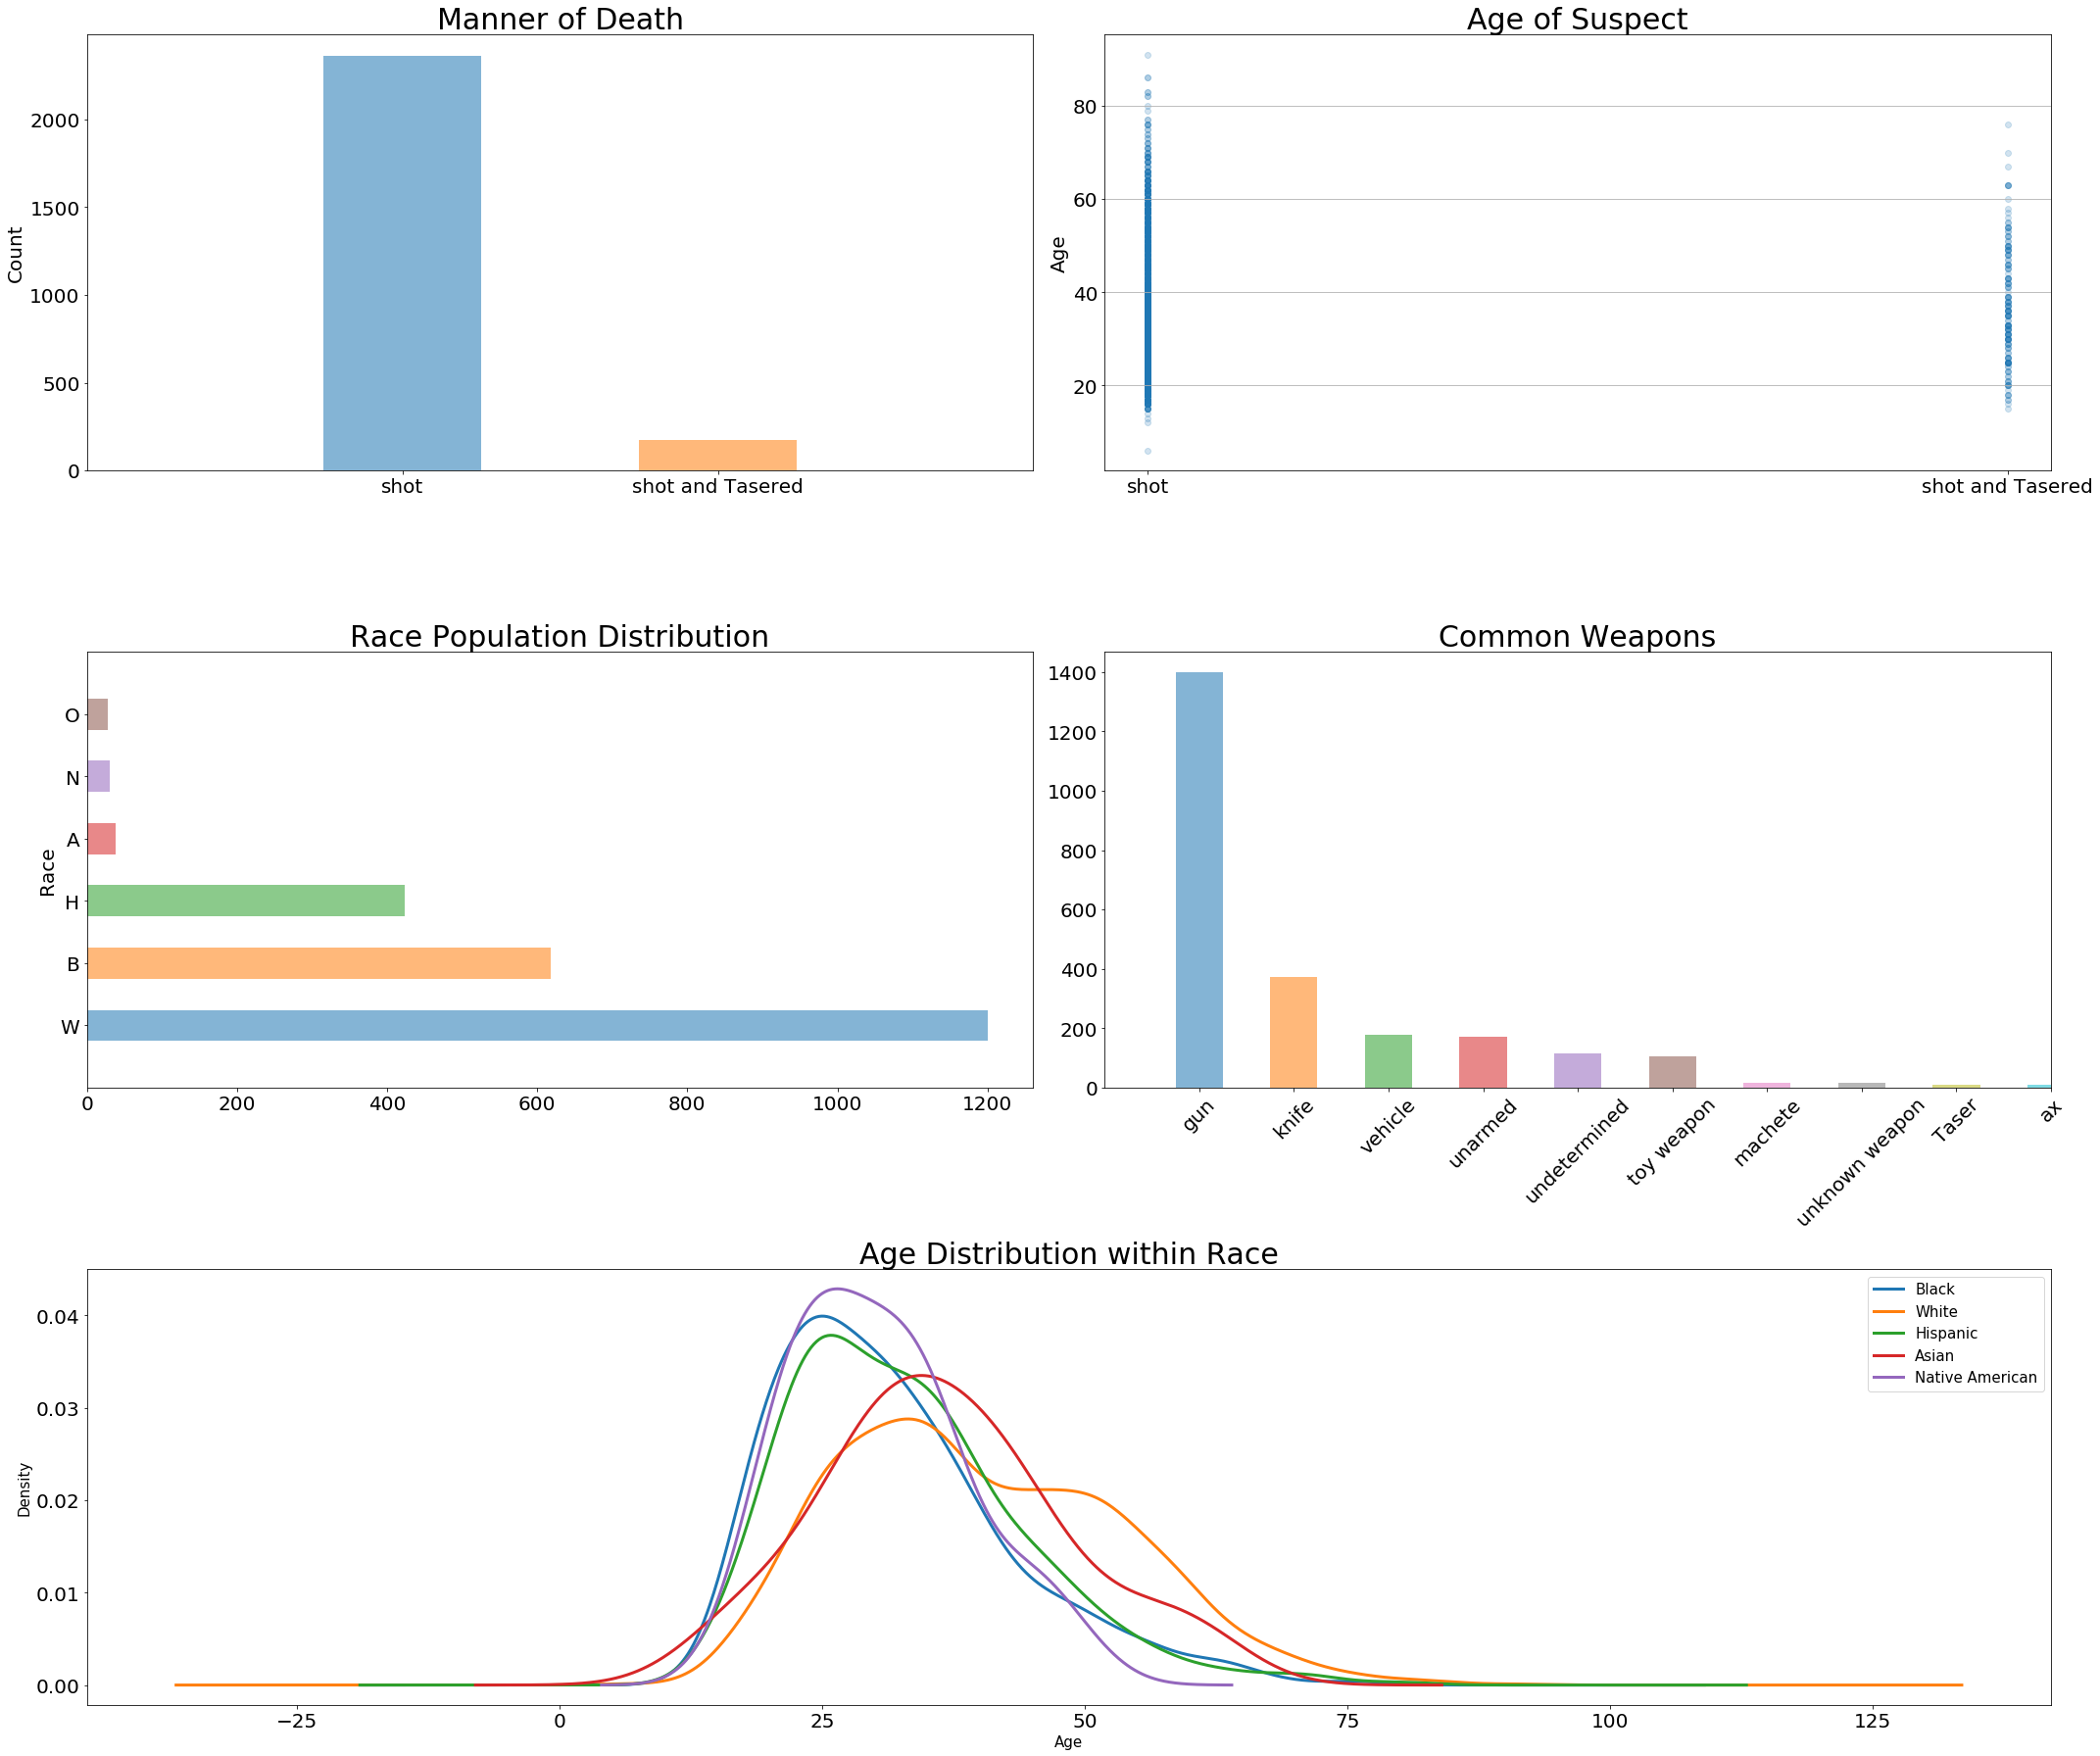

In [331]:
# specifies the parameters of our graphs
N = 100
fig = plt.figure(figsize=(30,25)) 
alpha=alpha_scatterplot = 0.2 
alpha_bar_chart = 0.55
# lets us plot many diffrent shaped graphs together 

ax1 = plt.subplot2grid((3,2),(0,0))
# plots a bar graph of those who surived vs those who did not.               
killings.manner_of_death.value_counts().plot(kind='bar',alpha=alpha_bar_chart)
# this nicely sets the margins in matplotlib to deal with a recent bug 1.3.1
ax1.set_xlim(-1, 2)
plt.ylabel("Count",fontsize=20)
plt.xticks(rotation='horizontal')
# puts a title on our graph
plt.title("Manner of Death", fontsize=30)

plt.subplot2grid((3,2),(0,1))
plt.scatter(killings.manner_of_death, killings.age, alpha=alpha_scatterplot)
# sets the y axis lable
plt.ylabel("Age",fontsize=20)
# formats the grid line style of our graphs                          
plt.grid(b=True, which='major', axis='y')  
plt.title("Age of Suspect",fontsize=30)

ax3 = plt.subplot2grid((3,2),(1,0))
killings.race.value_counts().plot(kind="barh",alpha=alpha_bar_chart)
ax3.set_ylim(-1, len(killings.race.value_counts()))
plt.ylabel("Race",fontsize=20)
plt.title("Race Population Distribution",fontsize=30)
#ax3.legend()


ax5 = plt.subplot2grid((3,2),(1,1),colspan=2)
killings.armed.value_counts().plot(kind='bar',alpha=alpha_bar_chart)
ax5.set_xlim(-1, 9)
plt.xticks(rotation=45)
# specifies the parameters of our graphs
plt.title("Common Weapons",fontsize=30)

plt.subplot2grid((3,2),(2,0), colspan=2)
# plots a kernel density estimate of the subset of the 1st class passangers's age
killings.age[killings.race == "B"].plot(kind='kde',linewidth=3)    
killings.age[killings.race =="W"].plot(kind='kde',linewidth=3)
killings.age[killings.race =="H"].plot(kind='kde',linewidth=3)
killings.age[killings.race =="A"].plot(kind='kde',linewidth=3)
killings.age[killings.race =="N"].plot(kind='kde',linewidth=3)
 # plots an axis lable
plt.xlabel("Age",fontsize=15)    
plt.ylabel("Density",fontsize=15) 
plt.title("Age Distribution within Race",fontsize=30)
# sets our legend for our graph.
plt.legend(('Black', 'White','Hispanic',"Asian","Native American"),fontsize=15,loc='best')
plt.tight_layout()

### Body Camera Usage Over the Years

In [333]:
killings["date"]=killings["date"].map(lambda x : datetime.strptime(x,'%d/%m/%y'))

In [334]:
killings.set_index(["date"],inplace=True)

In [335]:
killings.head()

,id,name,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
date,,,,,,,,,,,,,
2015-01-02,3,Tim Elliot,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
2015-01-02,4,Lewis Lee Lembke,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2015-01-03,5,John Paul Quintero,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
2015-01-04,8,Matthew Hoffman,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
2015-01-04,9,Michael Rodriguez,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [336]:
usage =[]
b_cam =killings[killings["body_camera"]==True]
usage.append(b_cam[b_cam.index.year ==2015]["body_camera"].sum())
usage.append(b_cam[b_cam.index.year ==2016]["body_camera"].sum())
usage.append(b_cam[b_cam.index.year ==2017]["body_camera"].sum())

In [337]:
usage

[74, 138, 59]

In [338]:
trace0 = go.Bar(
    y = usage,
    x =["2015","2016","2017"],
    marker = dict(
        color = ['#ccffe6','#ffcccc','#ccccff'],
        line = dict(
            color = 'rgba(246, 78, 139, 1.0)',
            width = 1)
    )
)
data = [trace0]
layout = go.Layout(
    title = "Body Camera Usage Between 2015 and 2017",
    showlegend=False,
    height=700,
    xaxis=dict(
        tickangle=-45,
    ),
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='marker-h-bar')

### Gender of Suspects and Manner Death

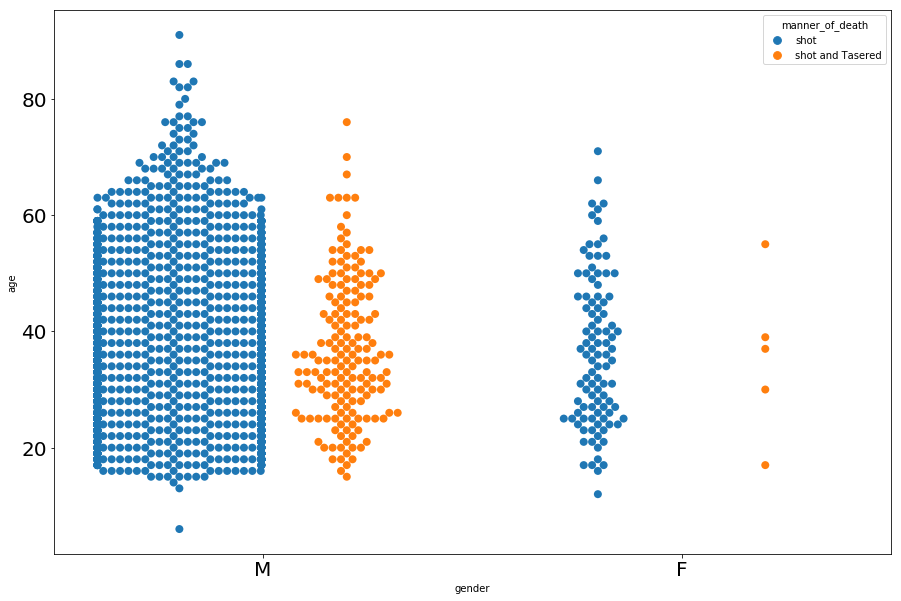

In [339]:
plt.figure(figsize=(15,10))
sns.swarmplot(x = 'gender', y = 'age', hue = 'manner_of_death',size=8,dodge=True,data = killings)

### Fatal Shootings By Population Ratio

In [340]:
population = pd.DataFrame(race.iloc[:,2:].sum()).T

In [341]:
population.head()

,share_white,share_black,share_native_american,share_asian,share_hispanic
0,2433809.0,199898.6,84094.9,45156.5,272867.9


In [342]:
population["Total"] = population.sum(axis=1)

In [343]:
population

,share_white,share_black,share_native_american,share_asian,share_hispanic,Total
0,2433809.0,199898.6,84094.9,45156.5,272867.9,3035826.9


In [344]:
W =float(np.round((killings[killings["race"]=="W"]["race"].count()/population["Total"])*100,4))
B =float(np.round((killings[killings["race"]=="B"]["race"].count()/population["Total"])*100,4))
H =float(np.round((killings[killings["race"]=="H"]["race"].count()/population["Total"])*100,4))
A =float(np.round((killings[killings["race"]=="A"]["race"].count()/population["Total"])*100,4))
N =float(np.round((killings[killings["race"]=="N"]["race"].count()/population["Total"])*100,4))
O =float(np.round((killings[killings["race"]=="O"]["race"].count()/population["Total"])*100,4))

In [345]:
a =[W,B,H,A,N,O]

In [346]:
ratio = pd.DataFrame(columns=["ratio-white","ratio-black","ratio-native","ratio-asian","ratio-hispanic","Other"])

In [347]:
ratio.loc[len(ratio)] = a

In [348]:
ratio

,ratio-white,ratio-black,ratio-native,ratio-asian,ratio-hispanic,Other
0,0.0396,0.0204,0.0139,0.0013,0.001,0.0009


In [349]:
ratio = ratio.drop(["Other"],axis=1)

In [350]:
population = population.drop(["Total"],axis=1)

Text(0.5, 1.0, 'Victims Race to population Ratio')

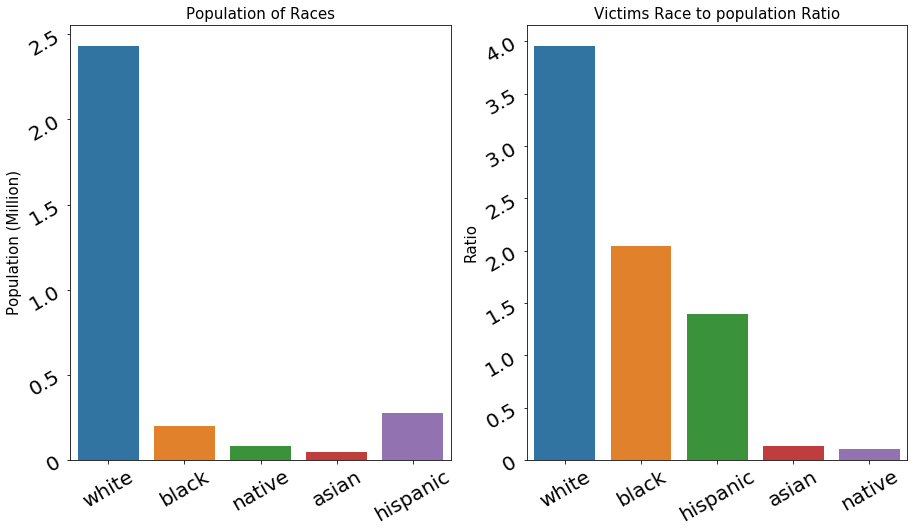

In [369]:
plt.figure(figsize=(15,8))
plt.subplot2grid((1,2),(0,0))
g=sns.barplot(x=population.columns,y=list(population.values.ravel()))
g.set_yticklabels(["0","0.5","1.0","1.5","2.0","2.5"],rotation=30)
g.set_ylabel("Population (Million)",fontsize=15)
g.set_xticklabels(["white","black","native","asian","hispanic"],rotation=30)
g.set_ylabel("Population (Million)",fontsize=15)
plt.title("Population of Races",fontsize=15)

#plt.subplots_adjust(right=0.8)
plt.subplot2grid((1,2),(0,1))
d=sns.barplot(x=ratio.columns,y=list(ratio.values.ravel()))
d.set_xticklabels(["white","black","hispanic","asian","native"],rotation=30)
d.set_yticklabels(["0","0.5","1.0","1.5","2.0","2.5","3.0","3.5","4.0"],rotation=30)
d.set_ylabel("Ratio",fontsize=15)
plt.title("Victims Race to population Ratio",fontsize=15)


### Fatal Shootings By City

In [352]:
kil =killings.groupby(["city"]).size()
kil=pd.DataFrame(kil.reset_index())
kil.columns = ["city","count"]
kil = kil.sort_values(["count"],ascending=False)
kil_ten= kil.iloc[0:10]

In [353]:
kil_ten["perc"]=list(np.round((kil_ten["count"]/kil_ten["count"].sum())*100,2).values)

In [354]:
kil_ten

,city,count,perc
732,Los Angeles,39,16.74
995,Phoenix,31,13.30
578,Houston,27,11.59
241,Chicago,25,10.73
687,Las Vegas,21,9.01
1118,San Antonio,20,8.58
284,Columbus,19,8.15
808,Miami,18,7.73
60,Austin,18,7.73
1217,St. Louis,15,6.44


In [361]:
data = [
    {
        'x': kil_ten["city"],
        'y': kil_ten["count"],
        'mode': 'markers',
        'marker': {
            'color': kil_ten["count"],
            'size': [150, 135, 120, 105, 90, 75, 60, 45, 30, 15],
            'showscale': True
        }
    }
]
layout = go.Layout(
        title= 'Number of City Shootings',
        hovermode= 'closest',
        xaxis=dict(
            title = "Cities"
        ),
                   
        yaxis=dict(
            title = "Top Ten Cities with Highest Fatalities"
        ),
        showlegend=False,
        )
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='scatter-colorscale')